In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
data_path = ("/Users/tongzhang/Downloads/sentiment labelled sentences/amazon_cells_labelled.txt")
review_raw = pd.read_csv(data_path, delimiter= '\t', header=None)
review_raw.columns = ['message', 'feedback']

In [30]:
keywords = ['good', 'must', 'great', 'impressed', 'recommend', 'ideal', 'nice','like','better','worked','very', 'new','don\'t','works','excellent','best','love','well','bad','but','poor','not','disappointed']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    review_raw[str(key)] = review_raw.message.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
data = review_raw[keywords]
target = review_raw['feedback']

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 328


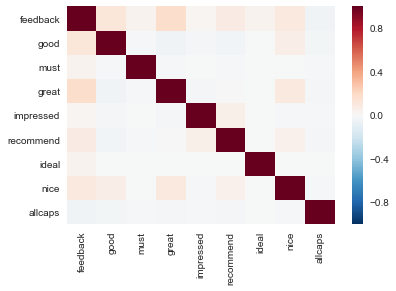

In [6]:
sns.heatmap(review_raw.corr())

In [19]:
from collections import Counter
Counter(" ".join(review_raw["message"]).split()).most_common(100)

[('the', 414),
 ('and', 307),
 ('I', 303),
 ('is', 238),
 ('a', 207),
 ('to', 195),
 ('it', 176),
 ('this', 143),
 ('my', 130),
 ('of', 117),
 ('for', 114),
 ('phone', 110),
 ('with', 106),
 ('The', 97),
 ('not', 91),
 ('was', 87),
 ('on', 86),
 ('in', 84),
 ('very', 80),
 ('have', 72),
 ('that', 71),
 ('It', 61),
 ('good', 53),
 ('This', 53),
 ('you', 52),
 ('had', 43),
 ('as', 42),
 ('but', 41),
 ('are', 40),
 ('has', 33),
 ('great', 33),
 ('one', 32),
 ('sound', 32),
 ('quality', 32),
 ('from', 32),
 ('your', 32),
 ('so', 32),
 ('it.', 31),
 ('Great', 30),
 ('would', 30),
 ('like', 30),
 ('headset', 29),
 ('phone.', 28),
 ("I've", 28),
 ('works', 28),
 ('than', 27),
 ('battery', 27),
 ('all', 27),
 ('use', 27),
 ('be', 25),
 ('recommend', 24),
 ('product', 24),
 ('-', 24),
 ('or', 23),
 ('at', 23),
 ('work', 23),
 ('get', 22),
 ('really', 22),
 ('up', 21),
 ('when', 20),
 ('out', 20),
 ('product.', 20),
 ('only', 20),
 ("I'm", 20),
 ('am', 20),
 ('no', 19),
 ('me', 19),
 ('ear', 19)